# Introducción

El presente trabajo presenta el desarrollo del juego Quoridor como trabajo del curso de Complejidad Algorítmica. El objetivo del trabajo es utilizar los conocimientos adquiridos en clase en la solución de problemas y en la búsqueda de posibles soluciones a estos. Enfocandose en que la respuesta sea convincente y la más eficiente.

El desarrollo del juego ayudará a hacer uso de estructuras de datos y algoritmos mostrados en el curso. Así, podemos demostrar ser capaces de utilizar estas herramientas en problemas que se presentan en el transcurso de nuestra vida. Estas herramientas, se utilizar día a día en diversas situaciones. Si bien las personas no se enfocan en volver a crearlas, estás necesitan entenderlas para poder darles uso y crear soluciones innovadoras.

El grupo es conformado por estudiantes de la carrera de Ingeniería de Software. Nuestra motivación para el trabajo es poder ser participes del diseño de un juego que involucre el uso de algoritmos para su desarrollo. Asimismo, nos motiva la metodología cientifica que tiene el proyecto para su realización, ya que nos permite estar en los zapatos de una persona que estudia estos temas a mayor profundidad y a entender su motivación y su cariño a su futura profesión.

# Estado del Arte

Los algoritmos usados en el implementación del proyecto se listan a continuación:

*   Depth-first search
*   Breadth-first search
*   A*
*   Dijkstra

Se evaluará el resultado de cada uno estos al usarlos en el proyecto y se observarán los resultados para poder llegar a conclusiones. Se planea utilizar, para cada jugador, uno de los algoritmos mencionados en la lista de arriba. Así, tendremos una manera de compararlos.



Asimismo, se implementará una función que pueda medir los tiempos que toma cada uno de los algoritmos. Esto nos ayudará al momento de compararlos.

# Metodología

Para el juego, se genera un table de $n$ filas y $m$ columnas. Estas variables pueden ser modificadas por el usuario haciendo uso de los campos que se encuentran al lado derecho de los bloques de código. Con esta facilidad para cambiar los valores de los datos del tablero, podemos experimentar con diferentes dimensiones. En este caso, se están tomando como datos de entrada los siguientes valores, cada punto representa las dimensiones del tablero a utilizar de la forma $n \times m$, donde $n$ representa las filas y $m$ las columnas:

*   $9\times9$
*   $99\times99$
*   $999\times999$
*   $9999\times9999$
*   $99999\times99999$
*   $999999\times999999$

Como se puede apreciar en la lista mostrada anteriormente, los valores son de la forma $10^i - 1$, así podemos tomar una muestra en donde los valores crezcan de forma rápida y determinar una aproximación para el valor en donde los algoritmos utilizados para el proyecto empiezan a dejar de ser tan eficientes.

Para los jugadores, como se mencionó en la sección **Estado del Arte**, se planea usar los algoritmos mencionados de forma que cada jugador funcione con un algoritmo de la lista. así podremos ver las diferencias entre cada uno de estos.

# Experimentos

In [3]:
import networkx as nx

Luego de importar los módulos necesarios para el desarrollo del programa, implementamos una función cuya funcionalidad será la de generar los tableros.

`generate_board(n, m)`: generar un grafo con forma de una matriz 2D. Se necesita especificar el número de filas ***n*** y el número de columnas ***m***

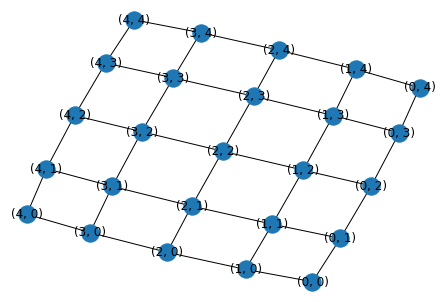

In [5]:
def generate_board(n, m):
  return nx.grid_2d_graph(n, m)

n =  5#@param {type:"integer"}
m =  5#@param {type:"integer"}

G = nx.grid_2d_graph(n, m)
pos = nx.spring_layout(G, iterations=100)
nx.draw(G, pos, with_labels=True)

In [8]:
n_player =  2#@param {type:"integer"}

# Asignación de las posiciones de cada jugador            
def get_init_pos(p):
  positions = { 
    1: (0, m // 2),         # Posición jugador 1
    2: (n - 1, m // 2),     # Posición jugador 3
    3: (n // 2, 0),         # Posición jugador 2
    4: (n // 2, m - 1)      # Posición jugador 4
  }
  return positions[p]

for i in range(n_player):
  print('Jugador ' + str(i + 1) + ':', get_init_pos(i + 1))


# Resultados

Jugador 1: (0, 2)
Jugador 2: (4, 2)


# Conclusiones